In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading in Data

In [2]:
movies = pd.read_csv("ml-25m/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv("ml-25m/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
tags = pd.read_csv("ml-25m/tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


# Formatting the Data

In [5]:
# Getting all unique genres

all_genres = set()
for row in movies.genres:
    
    if row == "(no genres listed)":
        continue
        
    genre_list = row.split("|")
    
    for genre in genre_list:
        all_genres.add(genre)
        
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [6]:
# Creating new genre columns

for genre in all_genres:
    movies[genre] = 0
    
movies.head()

,movieId,title,genres,Horror,War,Romance,Animation,Comedy,Western,Documentary,...,Thriller,Adventure,Crime,Sci-Fi,Fantasy,Film-Noir,Children,Musical,IMAX,Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Assigning values to genre columns (may take some time to run)

for movie_id in movies.movieId:
    genres = movies.loc[movies.movieId == movie_id, "genres"].values[0]
    if genres == "(no genres listed)":
        continue
    genre_list = genres.split("|")
    for genre in genre_list:
        movies.loc[movies.movieId == movie_id, genre] = 1

movies

,movieId,title,genres,Horror,War,Romance,Animation,Comedy,Western,Documentary,...,Thriller,Adventure,Crime,Sci-Fi,Fantasy,Film-Noir,Children,Musical,IMAX,Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62419,209159,Window of the Soul (2001),Documentary,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62420,209163,Bad Poems (2018),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62421,209169,A Girl Thing (2001),(no genres listed),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression for a Single User (userId = 1)

In [8]:
# Looking at user id 1

user1 = ratings[ratings.userId == 1]
user1

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
65,1,27193,3.0,1147879774
66,1,27266,4.5,1147879365
67,1,27721,3.0,1147869115
68,1,31956,3.5,1147877610


In [9]:
# Creating feature dataframe

feature_df = pd.DataFrame()
for movie in user1.movieId:
    feature_df = pd.concat([feature_df, 
                            movies.loc[movies.movieId == movie, list(all_genres)]])
    
feature_df["rating"] = list(user1.rating)

feature_df

,Horror,War,Romance,Animation,Comedy,Western,Documentary,Mystery,Drama,Thriller,Adventure,Crime,Sci-Fi,Fantasy,Film-Noir,Children,Musical,IMAX,Action,rating
292,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,5.0
302,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.5
303,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5.0
654,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5.0
878,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0
9145,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,4.5
9306,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,3.0
9647,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.5


In [10]:
# Train-test split

from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    feature_df.iloc[:, :-1], feature_df.rating, 
    test_size=TEST_SIZE, random_state=42)

print("Training data: " + str(X_train.shape[0]) + " rows")
print("Test data: " + str(X_test.shape[0]) + " rows")

Training data: 56 rows
Test data: 14 rows


In [11]:
# Running linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

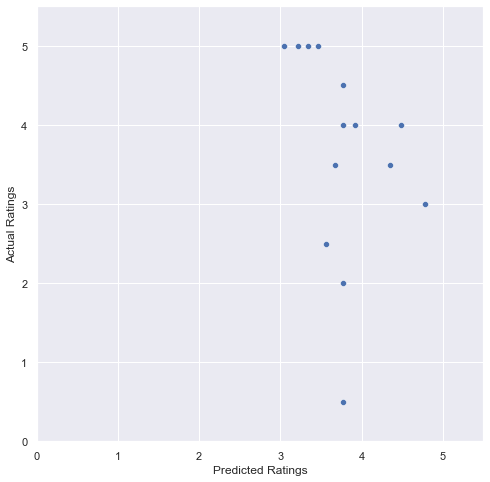

In [12]:
# Predicting on test data

sns.set(rc={'figure.figsize':(8,8)})

y_pred = model.predict(X_test)
y_true = y_test
ax = sns.scatterplot(x=y_pred, y=y_true)
ax.set(xlabel='Predicted Ratings', ylabel='Actual Ratings')

plt.xlim([0, 5.5])
plt.ylim([0, 5.5])
plt.show()

In [13]:
# Getting evaluation metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: " + str(mean_squared_error(y_true, y_pred)))
print("MAE: " + str(mean_absolute_error(y_true, y_pred)))
print("R2: " + str(r2_score(y_true, y_pred)))

MSE: 2.279491206309165
MAE: 1.2420240701790406
R2: -0.39946836785151585


In [14]:
movies.shape

(62423, 22)

In [15]:
# Filtering out 60% of least popular films

PROP_FILTERED = 0.4

sorted_movies = ratings.groupby("movieId").count().sort_values(
    by="userId", ascending=False).index

top_movies = sorted_movies[:int(PROP_FILTERED * len(sorted_movies))]
top_movies

Int64Index([   356,    318,    296,    593,   2571,    260,    480,    527,
               110,   2959,
            ...
             98996,  99028,  99054, 112255, 187325,  99064, 144572, 144608,
             97768, 144602],
           dtype='int64', name='movieId', length=23618)

In [16]:
# Ranking recommended films

unwatched_movies = movies[~movies.movieId.isin(user1.movieId)]
print(unwatched_movies.shape)

top_unwatched = unwatched_movies.loc[unwatched_movies.movieId.isin(top_movies)]

predictions = model.predict(top_unwatched[list(all_genres)])
predictions.sort()
predictions = predictions[::-1]
predictions

(62353, 22)


array([6.39114569, 6.20841346, 6.20841346, ..., 0.67043047, 0.67043047,
       0.67043047])

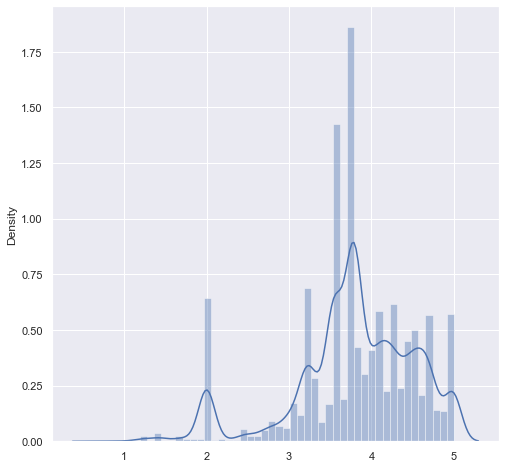

In [17]:
# Cap predictions at 5.0 rating

capped_pred = list(np.repeat(5, len(predictions[np.where(predictions > 5)])))

capped_pred = capped_pred + list(predictions[np.where(predictions <= 5)])

sns.distplot(capped_pred)

# Condensing Linear Regression into a Pipeline

In [18]:
def linear_pipeline(user, k, tts=1):
    user_ratings = ratings[ratings.userId == user].sample(frac=tts)
    
    # Creating feature dataframe

    feature_df = pd.DataFrame()
    for movie in user_ratings.movieId:
        feature_df = pd.concat([feature_df, 
                                movies.loc[movies.movieId == movie, list(all_genres)]])

    feature_df["rating"] = list(user_ratings.rating)

    model = LinearRegression()
    model.fit(X=feature_df.iloc[:, :-1], y=feature_df.rating)
    
    predictions = model.predict(movies[list(all_genres)])
    
    predicted_ratings = pd.DataFrame()
    predicted_ratings["movieId"] = movies["movieId"]
    predicted_ratings["title"] = movies["title"]
    predicted_ratings["predicted_rating"] = predictions
    
    # Removing already-watched titles
    watched_movies = user_ratings["movieId"]
    predicted_ratings = predicted_ratings[~predicted_ratings.movieId.isin(watched_movies)]
    
    predicted_ratings.sort_values(by="predicted_rating", ascending=False, inplace=True)
    
    return predicted_ratings.head(k)

In [19]:
linear_pipeline(1, 5)

,movieId,title,predicted_rating
4614,4719,Osmosis Jones (2001),5.795412
454,459,"Getaway, The (1994)",5.609739
9542,31367,"Chase, The (1994)",5.509348
3104,3197,"Presidio, The (1988)",5.507649
24547,121753,Triplecross (1995),5.507649


In [20]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


# Content-Based Filtering for a Single User (userId = 1)

In [21]:
# Get genres from movies that a user has rated
user_id = 1
user_movies = ratings.loc[ratings.userId == user_id].sort_values(by="movieId")
movie_ids = user_movies["movieId"]
userGenreTable = movies[movies.movieId.isin(movie_ids)]
print(userGenreTable.shape)
userGenreTable.head()

(70, 22)


,movieId,title,genres,Horror,War,Romance,Animation,Comedy,Western,Documentary,...,Thriller,Adventure,Crime,Sci-Fi,Fantasy,Film-Noir,Children,Musical,IMAX,Action
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
302,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,665,Underground (1995),Comedy|Drama|War,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
878,899,Singin' in the Rain (1952),Comedy|Musical|Romance,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
userGenreTable[list(all_genres)].transpose()

,292,302,303,654,878,1061,1147,1186,1205,1217,...,7972,8015,8072,8158,8258,9122,9145,9306,9647,9780
Horror,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
War,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Romance,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,1,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
Western,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mystery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Drama,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Thriller,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
#Dot produt to get weights
userGenreTable2 = userGenreTable[list(all_genres)].reset_index().drop(columns="index").transpose()
userProfile = userGenreTable2.dot(user_movies["rating"])
pd.DataFrame(userProfile, columns=["Weight"])

,Weight
Horror,3.5
War,19.5
Romance,75.0
Animation,8.0
Comedy,89.0
Western,2.5
Documentary,2.0
Mystery,14.0
Drama,205.0
Thriller,21.5


In [24]:
# Get genres of movies user hasn't watched
genreTable = movies[["movieId"] + list(all_genres)]
genreTable = genreTable[~genreTable.movieId.isin(movie_ids)]
genreTable

,movieId,Horror,War,Romance,Animation,Comedy,Western,Documentary,Mystery,Drama,Thriller,Adventure,Crime,Sci-Fi,Fantasy,Film-Noir,Children,Musical,IMAX,Action
0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
62419,209159,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
62420,209163,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
62421,209169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable.iloc[:, 1:]*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

0    0.279167
1    0.117500
2    0.273333
3    0.615000
4    0.148333
dtype: float64

In [26]:
rating_counts = ratings.groupby("movieId").count()["userId"]

In [27]:
titles = []
num_ratings_lst = []
for movie_id in movie_ids:
    
    num_ratings_lst.append(rating_counts[movie_id])
    
    title = movies.loc[movies.movieId == movie_id, "title"].values
    if len(title) == 0:
        titles.append(np.nan)
    else:
        titles.append(title[0])
        
user_movies2 = user_movies.drop(columns=["userId", "timestamp"])
user_movies2["title"] = titles
user_movies2["num_ratings"] = num_ratings_lst
user_movies2

,movieId,rating,title,num_ratings
0,296,5.0,Pulp Fiction (1994),79672
1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994),7058
2,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),6616
3,665,5.0,Underground (1995),1269
4,899,3.5,Singin' in the Rain (1952),10895
...,...,...,...,...
65,27193,3.0,Taxi 2 (2000),677
66,27266,4.5,2046 (2004),1375
67,27721,3.0,"Very Long Engagement, A (Un long dimanche de f...",2117
68,31956,3.5,5x2 (2004),147


In [28]:
recommendations = pd.DataFrame()
recommendations["movieId"] = movie_ids

titles = []
num_ratings_lst = []
for movie_id in movie_ids:
    
    num_ratings_lst.append(rating_counts[movie_id])
    
    title = movies.loc[movies.movieId == movie_id, "title"].values
    if len(title) == 0:
        titles.append(np.nan)
    else:
        titles.append(title[0])

recommendations["title"] = titles
recommendations["num_ratings"] = num_ratings_lst
recommendations["rec_score"] = recommendationTable_df
recommendations.sort_values(by=["rec_score", "num_ratings"], ascending=False, inplace=True)
recommendations.head(10)

,movieId,title,num_ratings,rec_score
10,1260,M (1931),4636,0.615000
3,665,Underground (1995),1269,0.615000
57,8327,Dolls (2002),421,0.615000
51,7937,"Silence, The (Tystnaden) (1963)",405,0.615000
19,2692,Run Lola Run (Lola rennt) (1998),18891,0.607500
47,7327,Persona (1966),1800,0.530000
44,7234,"Strada, La (1954)",1150,0.525833
28,4703,Chocolat (1988),1628,0.494167
48,7361,Eternal Sunshine of the Spotless Mind (2004),33225,0.466667
45,7318,"Passion of the Christ, The (2004)",4330,0.466667


# Content-Based Filtering Pipeline

In [29]:
def content_based_pipeline(user_id, k, tts=1):
    # Getting genres of movies user has watched
    user_movies = ratings.loc[ratings.userId == user_id].sort_values(by="movieId").sample(frac=tts)
    movie_ids = user_movies["movieId"]
    userGenreTable = movies[movies.movieId.isin(movie_ids)]
    
    # Getting user profile and genre weights based on user ratings
    userGenreTable2 = userGenreTable[list(all_genres)].reset_index().drop(columns="index").transpose()
    userRatings2 = user_movies["rating"].reset_index().drop(columns="index")
    userProfile = userGenreTable2.dot(userRatings2)["rating"]
    
    # Get genres of movies user hasn't watched
    genreTable = movies[["movieId"] + list(all_genres)]
    genreTable = genreTable[~genreTable.movieId.isin(movie_ids)]

    #Multiply the genres by the weights and then take the weighted average
    recommendationTable_df = ((genreTable.iloc[:, 1:]*userProfile).sum(axis=1))/(userProfile.sum())
    
    # Creating recommendation dataframe
    recommendations = pd.DataFrame()
    recommendations["movieId"] = movie_ids

    titles = []
    num_ratings_lst = []
    for movie_id in movie_ids:

        num_ratings_lst.append(rating_counts[movie_id])

        title = movies.loc[movies.movieId == movie_id, "title"].values
        if len(title) == 0:
            titles.append(np.nan)
        else:
            titles.append(title[0])

    recommendations["title"] = titles
    recommendations["num_ratings"] = num_ratings_lst
    recommendations["rec_score"] = recommendationTable_df
    
    # Sorting recommendations by score and number of ratings
    recommendations.sort_values(by=["rec_score", "num_ratings"], ascending=False, inplace=True)
    
    return recommendations.head(k)

In [30]:
content_based_pipeline(1, 5)

,movieId,title,num_ratings,rec_score
19,2692,Run Lola Run (Lola rennt) (1998),18891,0.602904
10,1260,M (1931),4636,0.602050
3,665,Underground (1995),1269,0.602050
57,8327,Dolls (2002),421,0.602050
51,7937,"Silence, The (Tystnaden) (1963)",405,0.602050


# Item-Item Correlation on Toy Story

In [31]:
mini_ratings = ratings.iloc[:int(ratings.shape[0] * 0.1)]
mini_ratings.shape

(2500009, 4)

In [32]:
moviemat = mini_ratings.pivot_table(index="userId", columns="movieId", values="rating")
moviemat.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208789,208793,208795,208800,208939,209049,209053,209055,209103,209163
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
movie = "Toy Story (1995)"
movie_id = movies.loc[movies.title == movie, "movieId"][0]
movie_id

1

In [34]:
user_ratings = moviemat[movie_id]
user_ratings

userId
1        NaN
2        3.5
3        4.0
4        3.0
5        4.0
        ... 
16654    NaN
16655    NaN
16656    5.0
16657    NaN
16658    5.0
Name: 1, Length: 16658, dtype: float64

In [35]:
similar_movies = moviemat.corrwith(user_ratings)
similar_movies

movieId
1         1.000000
2         0.327573
3         0.215914
4         0.166034
5         0.186446
            ...   
209049         NaN
209053         NaN
209055         NaN
209103         NaN
209163         NaN
Length: 29661, dtype: float64

In [36]:
corr_toy_story = pd.DataFrame(similar_movies, columns=["Correlation"])
corr_toy_story.dropna(inplace=True)
corr_toy_story.head()

,Correlation
movieId,
1,1.000000
2,0.327573
3,0.215914
4,0.166034
5,0.186446


In [37]:
sorted_corr = corr_toy_story.sort_values(by="Correlation", ascending=False)
titles = []
num_ratings_lst = []
for movie_id in sorted_corr.index:
    
    num_ratings_lst.append(rating_counts[movie_id])
    
    title = movies.loc[movies.movieId == movie_id, "title"].values
    if len(title) == 0:
        titles.append(np.nan)
    else:
        titles.append(title[0])

sorted_corr["num_ratings"] = num_ratings_lst
sorted_corr["title"] = titles
sorted_corr.head(10)

,Correlation,num_ratings,title
movieId,,,
1,1.0,57309,Toy Story (1995)
157847,1.0,38,Being Charlie (2016)
157055,1.0,8,Uncaged (2016)
157130,1.0,10,Despite the Falling Snow (2016)
199566,1.0,27,The Aftermath (2019)
27488,1.0,26,Stark Raving Mad (2002)
27018,1.0,25,Fudoh: The New Generation (Gokudô sengokushi: ...
199898,1.0,11,Rebelles (2019)
26966,1.0,50,"Brave, The (1997)"


# Item-Item Correlation Pipeline

In [38]:
def item_corr_pipeline(movie_id, k):
    # Getting user ratings and correlations
    user_ratings = moviemat[movie_id]
    similar_movies = moviemat.corrwith(user_ratings)
    
    corr_movie = pd.DataFrame(similar_movies, columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    # Sorting and labeling movies
    titles = []
    num_ratings_lst = []
    for mov_id in corr_movie.index:
        num_ratings_lst.append(rating_counts[mov_id])
        
        title = movies.loc[movies.movieId == mov_id, "title"].values
        if len(title) == 0:
            titles.append(np.nan)
        else:
            titles.append(title[0])

    corr_movie["num_ratings"] = num_ratings_lst
    corr_movie["title"] = titles
    
    sorted_corr = corr_movie.sort_values(by=["Correlation", "num_ratings"], ascending=False)
    
    # Removing original movie
    movie_title = movies.loc[movies.movieId == movie_id, "title"].values[0]
    sorted_corr = sorted_corr[sorted_corr.title != movie_title]

    return sorted_corr.head(k)

In [39]:
item_corr_pipeline(1, 5)

,Correlation,num_ratings,title
movieId,,,
2904,1.0,134,Rain (1932)
84116,1.0,132,Poetry (Shi) (2010)
5935,1.0,124,Class of 1984 (1982)
103554,1.0,109,"Hijacking, A (Kapringen) (2012)"
168420,1.0,109,Justice League Dark (2017)


# Item-Item Correlation Pipeline (with num_ratings filtering)

In [40]:
import math

def item_corr_filtering_pipeline(movie_id, k):
    # Getting user ratings and correlations
    user_ratings = moviemat[movie_id]
    similar_movies = moviemat.corrwith(user_ratings)
    
    corr_movie = pd.DataFrame(similar_movies, columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    # Sorting and labeling movies
    titles = []
    num_ratings_lst = []
    for mov_id in corr_movie.index:
        num_ratings_lst.append(rating_counts[mov_id])
        
        title = movies.loc[movies.movieId == mov_id, "title"].values
        if len(title) == 0:
            titles.append(np.nan)
        else:
            titles.append(title[0])

    corr_movie["num_ratings"] = num_ratings_lst
    corr_movie["title"] = titles
    
    # Filtering for movies with above sqrt(num_ratings of movie)
    movie_num_ratings = corr_movie.loc[corr_movie.index == movie_id, "num_ratings"].values[0]
    corr_movie = corr_movie[corr_movie["num_ratings"] >= movie_num_ratings / 2]
    
    sorted_corr = corr_movie.sort_values(by=["Correlation", "num_ratings"], ascending=False)
    
    # Removing original movie
    movie_title = movies.loc[movies.movieId == movie_id, "title"].values[0]
    sorted_corr = sorted_corr[sorted_corr.title != movie_title]

    return sorted_corr.head(k)

In [41]:
item_corr_filtering_pipeline(1, 5)

,Correlation,num_ratings,title
movieId,,,
4886,0.563718,34572,"Monsters, Inc. (2001)"
6377,0.525033,34712,Finding Nemo (2003)
8961,0.500724,30562,"Incredibles, The (2004)"
588,0.452784,43373,Aladdin (1992)
4306,0.434607,42303,Shrek (2001)


# Collaborative Filtering

In [88]:
from scipy.sparse import csr_matrix

import implicit

In [89]:
def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    N = df['userId'].nunique()
    M = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

In [91]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [94]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

movie_title_mapper = dict(zip(movies['title'], movies['movieId']))
movie_title_inv_mapper = dict(zip(movies['movieId'], movies['title']))

def get_movie_index(title):
    fuzzy_title = movie_finder(title)
    movie_id = movie_title_mapper[fuzzy_title]
    movie_idx = movie_mapper[movie_id]
    return movie_idx

def get_movie_title(movie_idx): 
    movie_id = movie_inv_mapper[movie_idx]
    title = movie_title_inv_mapper[movie_id]
    return title

In [92]:
model = implicit.als.AlternatingLeastSquares(factors=50)
model.fit(X)

  0%|          | 0/15 [00:00<?, ?it/s]

## Item-to-Item

In [95]:
movie_of_interest = 'forrest gump'

movie_index = get_movie_index(movie_of_interest)
related = model.similar_items(movie_index)
related

[(351, 1.0000001),
 (475, 0.8930721),
 (314, 0.8925462),
 (585, 0.8896861),
 (108, 0.8797132),
 (522, 0.8672306),
 (292, 0.84966266),
 (148, 0.7993004),
 (581, 0.7892293),
 (452, 0.77112365)]

In [96]:
print(f"Because you watched {movie_finder(movie_of_interest)}...")
for r in related:
    recommended_title = get_movie_title(r[0])
    if recommended_title != movie_finder(movie_of_interest):
        print(recommended_title)

Because you watched Forrest Gump (1994)...
Jurassic Park (1993)
Shawshank Redemption, The (1994)
Silence of the Lambs, The (1991)
Braveheart (1995)
Schindler's List (1993)
Pulp Fiction (1994)
Apollo 13 (1995)
Terminator 2: Judgment Day (1991)
Fugitive, The (1993)


In [109]:
def collab_item_pipeline(movie_id, k):
    movie_of_interest = movies.loc[movies.movieId == movie_id, "title"][0]
    movie_index = get_movie_index(movie_of_interest)
    related = model.similar_items(movie_index, N=k+1)
    
    print(f"Because you watched {movie_finder(movie_of_interest)}...")
    for r in related:
        recommended_title = get_movie_title(r[0])
        if recommended_title != movie_finder(movie_of_interest):
            print(recommended_title)

In [110]:
collab_item_pipeline(1, 5)

Because you watched Toy Story (1995)...
Aladdin (1992)
Lion King, The (1994)
Babe (1995)
Independence Day (a.k.a. ID4) (1996)
Jurassic Park (1993)


## User-to-Item

In [111]:
user_id = 1

In [112]:
X_t = X.T.tocsr()

user_idx = user_mapper[user_id]
recommendations = model.recommend(user_idx, X_t)
recommendations

[(304, 0.55639094),
 (7028, 0.53629565),
 (2233, 0.5299266),
 (4887, 0.5269372),
 (4131, 0.5060253),
 (5883, 0.49451232),
 (2990, 0.49209285),
 (4780, 0.49041083),
 (4201, 0.48634267),
 (5508, 0.48164037)]

In [113]:
for r in recommendations:
    recommended_title = get_movie_title(r[0])
    print(recommended_title)

Three Colors: White (Trzy kolory: Bialy) (1994)
Lord of the Rings: The Return of the King, The (2003)
Life Is Beautiful (La Vita è bella) (1997)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Amores Perros (Love's a Bitch) (2000)
Pianist, The (2002)
All About My Mother (Todo sobre mi madre) (1999)
Monsters, Inc. (2001)
Shrek (2001)
Spirited Away (Sen to Chihiro no kamikakushi) (2001)


In [125]:
def collab_pipeline(user_id, k, tts=1):
    X_t = X.T.tocsr()

    user_idx = user_mapper[user_id]
    recommendations = model.recommend(user_idx, X_t, N=k)
    
    df = pd.DataFrame()
    titles = []
    movie_ids = []
    num_ratings = []
    for r in recommendations:
        recommended_title = get_movie_title(r[0])
        titles.append(recommended_title)
        
        movie_id = movies.loc[movies.title == recommended_title, "movieId"].values[0]
        movie_ids.append(movie_id)
        
        num_rating = rating_counts[movie_id]
        num_ratings.append(num_rating)
    
    df["movieId"], df["title"], df["num_ratings"] = movie_ids, titles, num_ratings
    df.set_index("movieId", inplace=True)
    
    return df

In [135]:
collab_pipeline(1, 5)

,title,num_ratings
movieId,,
308,Three Colors: White (Trzy kolory: Bialy) (1994),5085
7153,"Lord of the Rings: The Return of the King, The...",50797
2324,Life Is Beautiful (La Vita è bella) (1997),23976
4993,"Lord of the Rings: The Fellowship of the Ring,...",55736
4235,Amores Perros (Love's a Bitch) (2000),6341


# Evaluation Metrics for each Pipeline (Precision@K and Recall@K)

In [260]:
def get_metrics(pipeline, k, tts=0.8, sample_size=0.2):
    # Getting array of unique users
    unique_users = ratings.userId.unique()
    
    # Getting random sample of users
    unique_users = np.random.choice(unique_users, round(unique_users.shape[0] * sample_size))
    
    precisions = np.array([])
    recalls = np.array([])
    
    count = 0
    for user in unique_users[:1]:
        user_movies = ratings.loc[ratings.userId == user, "movieId"]
        recommendations = pipeline(user, k, tts=tts)
        recommended_movies = recommendations.movieId
        
        true_pos = user_movies[user_movies.isin(recommended_movies)].shape[0]
        false_pos = k - true_pos
        false_neg = round(user_movies.shape[0] * tts) - true_pos
        
        precision = true_pos / (true_pos + false_pos)
        recall = true_pos / (true_pos + false_neg)
        
        precisions = np.append(precisions, precision)
        recalls = np.append(recalls, recall)
        
        count += 1
        if count % 100 == 0:
            print(str(count * 100/ len(unique_users)) + "% complete")
        
    return {"Precision Mean": precisions.mean(), "Recall Mean": recalls.mean()}

In [225]:
get_metrics(content_based_pipeline, 5)

0.3076165866863541% complete
0.6152331733727082% complete
0.9228497600590624% complete
1.2304663467454164% complete
1.5380829334317707% complete
1.8456995201181248% complete
2.153316106804479% complete
2.460932693490833% complete
2.768549280177187% complete
3.0761658668635414% complete
3.3837824535498955% complete
3.6913990402362495% complete
3.9990156269226036% complete
4.306632213608958% complete
4.614248800295312% complete
4.921865386981666% complete
5.22948197366802% complete
5.537098560354374% complete
5.844715147040729% complete
6.152331733727083% complete
6.459948320413437% complete
6.767564907099791% complete
7.075181493786145% complete
7.382798080472499% complete
7.690414667158853% complete
7.998031253845207% complete
8.305647840531561% complete
8.613264427217915% complete
8.92088101390427% complete
9.228497600590623% complete
9.536114187276977% complete
9.843730773963332% complete
10.151347360649686% complete
10.45896394733604% complete
10.766580534022394% complete
11.0741971

89.82404331241541% complete
90.13165989910176% complete
90.43927648578811% complete
90.74689307247446% complete
91.05450965916083% complete
91.36212624584718% complete
91.66974283253353% complete
91.97735941921988% complete
92.28497600590624% complete
92.5925925925926% complete
92.90020917927895% complete
93.2078257659653% complete
93.51544235265166% complete
93.82305893933801% complete
94.13067552602436% complete
94.43829211271071% complete
94.74590869939708% complete
95.05352528608343% complete
95.36114187276978% complete
95.66875845945613% complete
95.9763750461425% complete
96.28399163282884% complete
96.5916082195152% complete
96.89922480620154% complete
97.20684139288791% complete
97.51445797957426% complete
97.82207456626061% complete
98.12969115294696% complete
98.43730773963333% complete
98.74492432631968% complete
99.05254091300603% complete
99.36015749969238% complete
99.66777408637874% complete
99.97539067306509% complete


{'Precision Mean': 1.0, 'Recall Mean': 0.1131112001629787}

In [226]:
get_metrics(linear_pipeline, 5)

0.3076165866863541% complete
0.6152331733727082% complete
0.9228497600590624% complete
1.2304663467454164% complete
1.5380829334317707% complete
1.8456995201181248% complete
2.153316106804479% complete
2.460932693490833% complete
2.768549280177187% complete
3.0761658668635414% complete
3.3837824535498955% complete
3.6913990402362495% complete
3.9990156269226036% complete
4.306632213608958% complete
4.614248800295312% complete
4.921865386981666% complete
5.22948197366802% complete
5.537098560354374% complete
5.844715147040729% complete
6.152331733727083% complete
6.459948320413437% complete
6.767564907099791% complete
7.075181493786145% complete
7.382798080472499% complete
7.690414667158853% complete
7.998031253845207% complete
8.305647840531561% complete
8.613264427217915% complete
8.92088101390427% complete
9.228497600590623% complete
9.536114187276977% complete
9.843730773963332% complete
10.151347360649686% complete
10.45896394733604% complete
10.766580534022394% complete
11.0741971

89.82404331241541% complete
90.13165989910176% complete
90.43927648578811% complete
90.74689307247446% complete
91.05450965916083% complete
91.36212624584718% complete
91.66974283253353% complete
91.97735941921988% complete
92.28497600590624% complete
92.5925925925926% complete
92.90020917927895% complete
93.2078257659653% complete
93.51544235265166% complete
93.82305893933801% complete
94.13067552602436% complete
94.43829211271071% complete
94.74590869939708% complete
95.05352528608343% complete
95.36114187276978% complete
95.66875845945613% complete
95.9763750461425% complete
96.28399163282884% complete
96.5916082195152% complete
96.89922480620154% complete
97.20684139288791% complete
97.51445797957426% complete
97.82207456626061% complete
98.12969115294696% complete
98.43730773963333% complete
98.74492432631968% complete
99.05254091300603% complete
99.36015749969238% complete
99.66777408637874% complete
99.97539067306509% complete


{'Precision Mean': 0.0017226528854435833, 'Recall Mean': 9.340905163027219e-05}